# <center>US Baseball Players Salary Prediction</center>

## Modules

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder, StandardScaler
import missingno as msno
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Initialize Dataframe

In [4]:
df = pd.read_csv('Hitters.csv')
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [7]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [8]:
df.describe(include='O')

,League,Division,NewLeague
count,322,322,322
unique,2,2,2
top,A,W,A
freq,175,165,176


In [9]:
df.shape

(322, 20)

## Data Wrangling

In [10]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

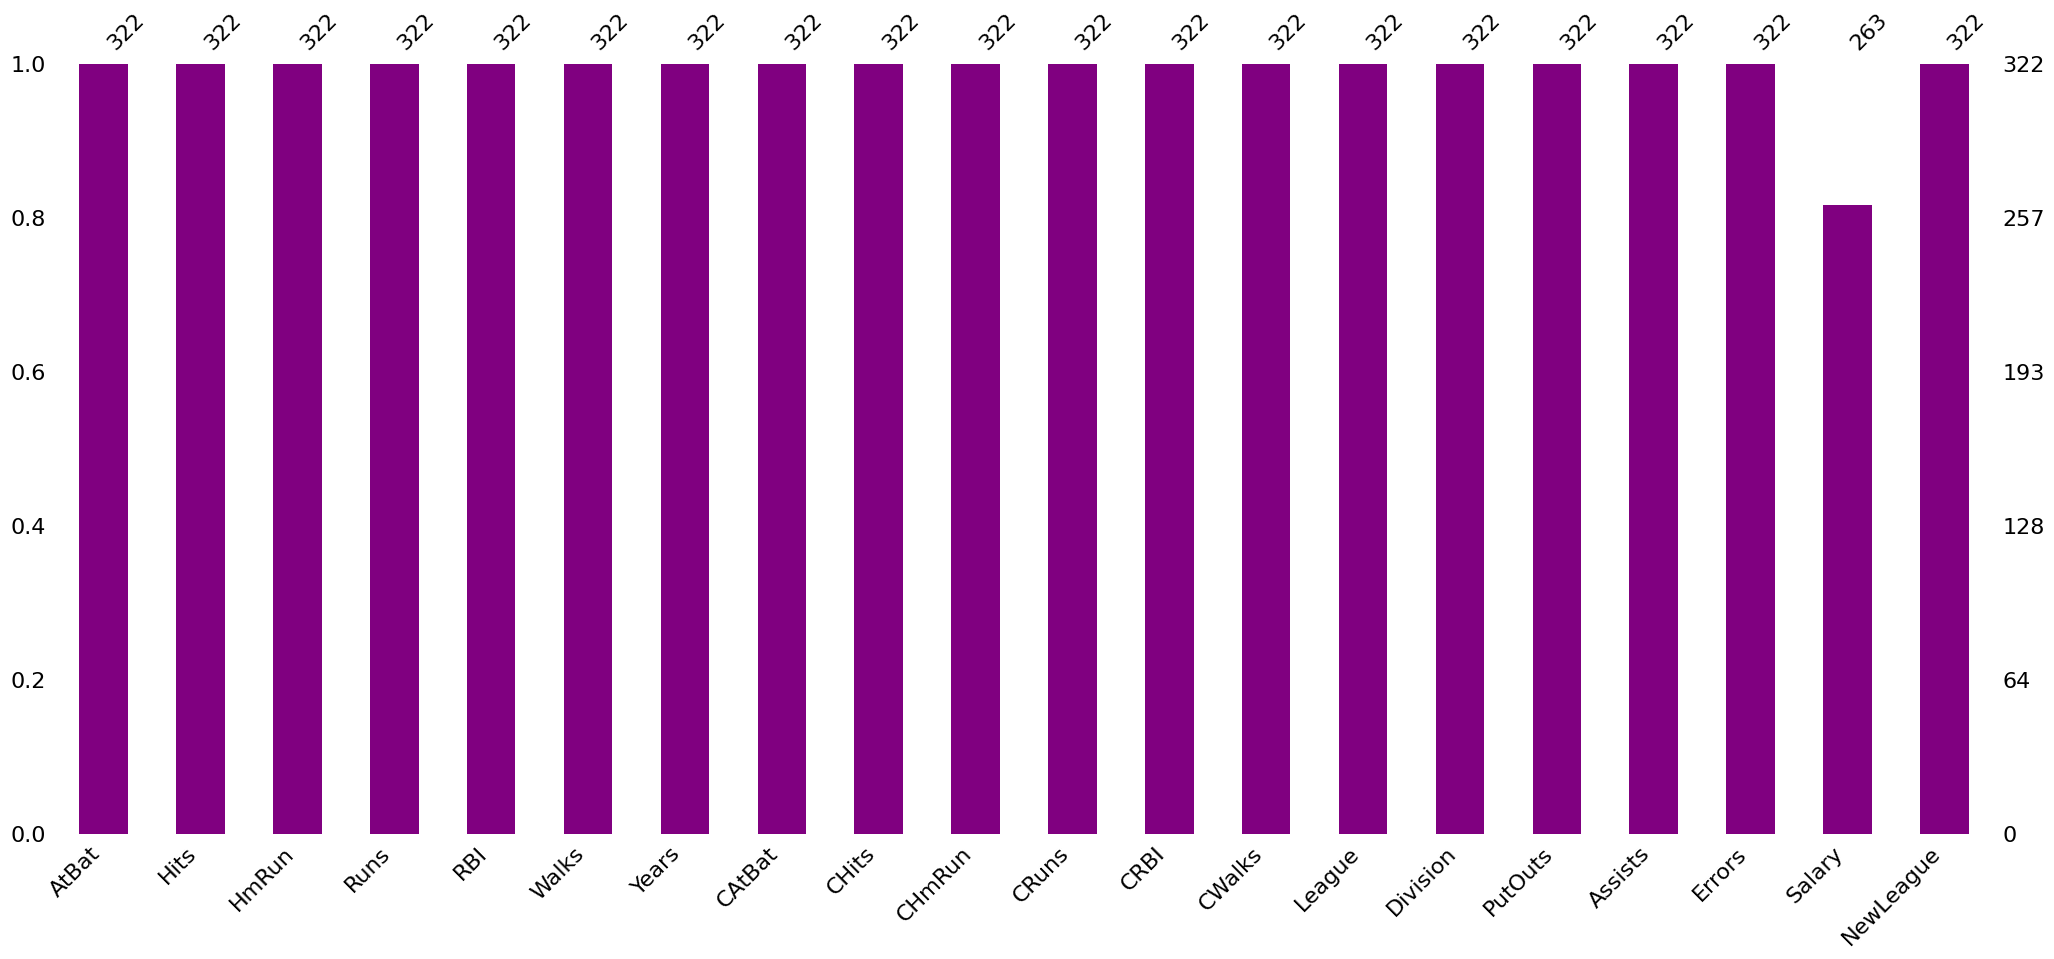

In [17]:
msno.bar(df, color='purple')
plt.show()

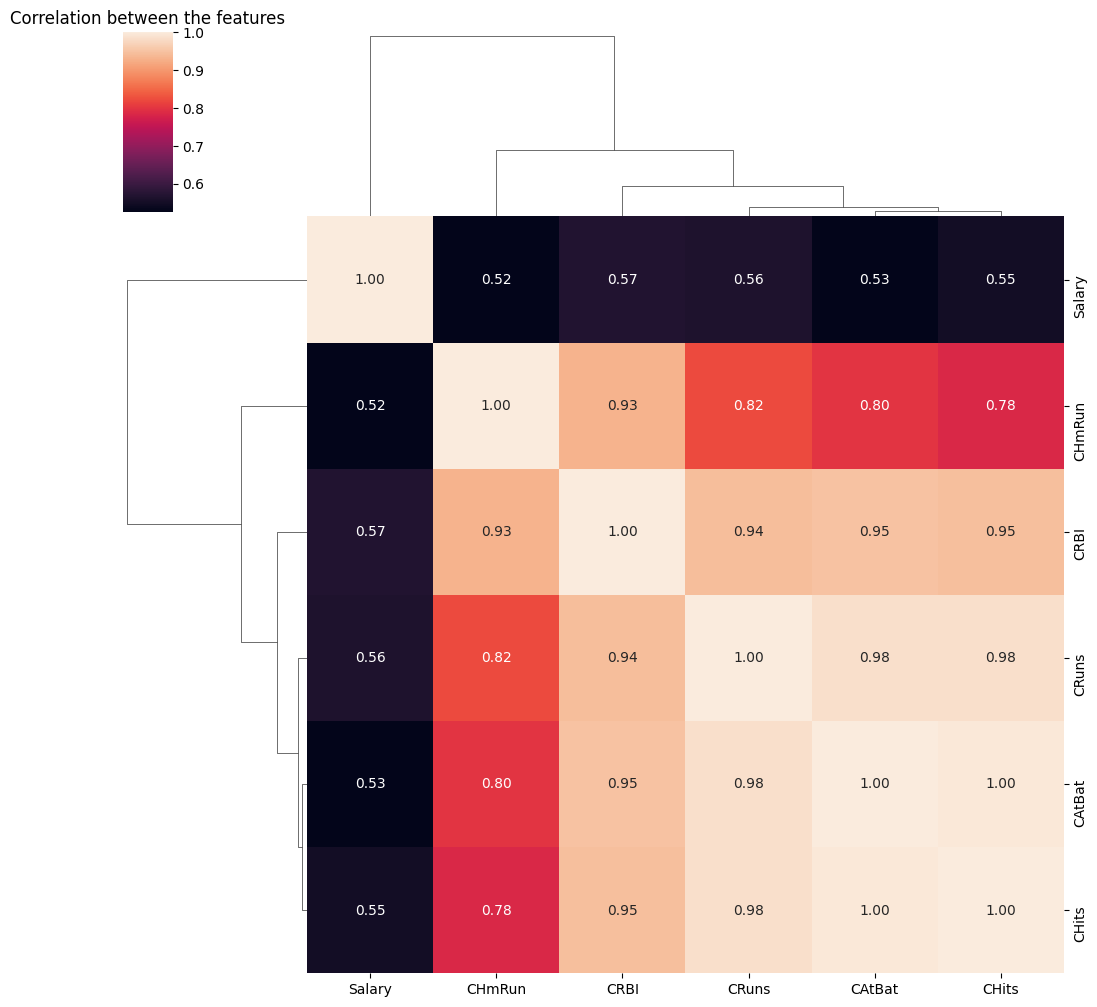

In [22]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_columns].corr().round(2)
filter_matrix = abs(corr_matrix['Salary']) > 0.5
corr_features = corr_matrix.columns[filter_matrix].tolist()

sns.clustermap(df[corr_features].corr(), annot=True, fmt='.2f')
plt.title('Correlation between the features')
plt.show()

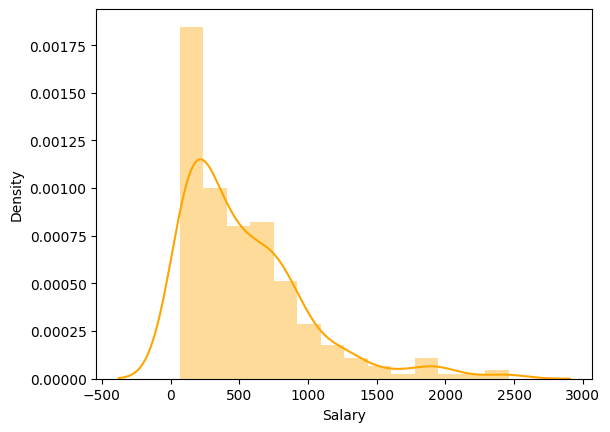

In [24]:
sns.distplot(a=df['Salary'], color='orange')
plt.show()

In [25]:
df['Salary'].skew()

1.5889673533412398

In [27]:
imputer = SimpleImputer(strategy='median')
df['Salary'] = imputer.fit_transform(df[['Salary']])

In [28]:
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [29]:
df.sort_values('Salary', ascending=False).head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
100,495,151,17,61,84,78,10,5624,1679,275,884,1015,709,A,E,1045,88,13,2460.000,A
163,618,200,20,98,110,62,13,7127,2163,351,1104,1289,564,A,E,330,16,8,2412.500,A
217,20,1,0,0,0,0,2,41,9,2,6,7,4,N,E,78,220,6,2127.333,N
82,677,238,31,117,113,53,5,2223,737,93,349,401,171,A,E,1377,100,6,1975.000,A
229,514,144,0,67,54,79,9,4739,1169,13,583,374,528,N,E,229,453,15,1940.000,N


In [30]:
df['League'].value_counts()

League
A    175
N    147
Name: count, dtype: int64

In [31]:
df['NewLeague'].value_counts()

NewLeague
A    176
N    146
Name: count, dtype: int64

In [32]:
df['Division'].value_counts()

Division
W    165
E    157
Name: count, dtype: int64

In [46]:
data = pd.get_dummies(df, columns=['League', 'Division', 'NewLeague'], drop_first=True).astype(float)
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293.0,66.0,1.0,30.0,29.0,14.0,1.0,293.0,66.0,1.0,30.0,29.0,14.0,446.0,33.0,20.0,425.0,0.0,0.0,0.0
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,475.0,1.0,1.0,1.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,480.0,0.0,1.0,0.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,500.0,1.0,0.0,1.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,91.5,1.0,0.0,1.0


##### Detect the outliers

In [47]:
clf = LocalOutlierFactor(n_neighbors=20, contamination='auto')
clf.fit_predict(data)
data_scores = clf.negative_outlier_factor_
data_scores = np.sort(data_scores)
data_scores[0:20]

array([-4.69087257, -4.43004807, -2.39770401, -2.30465502, -2.21055416,
       -1.94953928, -1.89453006, -1.87324055, -1.85075544, -1.7872398 ,
       -1.76713395, -1.64951258, -1.61671096, -1.56044439, -1.55683834,
       -1.5015729 , -1.4995785 , -1.48295991, -1.4483989 , -1.42328518])

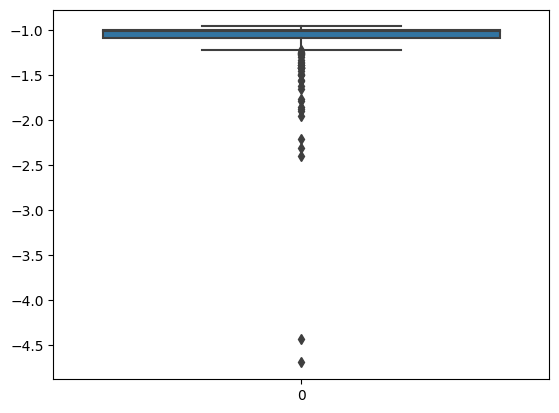

In [48]:
sns.boxplot(data_scores)
plt.show()

In [49]:
threshold = np.sort(data_scores)[5]
print(threshold)
data = data.loc[data_scores > threshold]
data = data.reset_index(drop=True)

-1.9495392751730212


In [53]:
data_X = data.drop(columns=['Salary', 'League_N', 'Division_W', 'NewLeague_N'])
data_X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,185.0,37.0,1.0,23.0,8.0,21.0,2.0,214.0,42.0,1.0,30.0,9.0,24.0,76.0,127.0,7.0
1,298.0,73.0,0.0,24.0,24.0,7.0,3.0,509.0,108.0,0.0,41.0,37.0,12.0,121.0,283.0,9.0
2,323.0,81.0,6.0,26.0,32.0,8.0,2.0,341.0,86.0,6.0,32.0,34.0,8.0,143.0,290.0,19.0
3,401.0,92.0,17.0,49.0,66.0,65.0,13.0,5206.0,1332.0,253.0,784.0,890.0,866.0,0.0,0.0,0.0
4,574.0,159.0,21.0,107.0,75.0,59.0,10.0,4631.0,1300.0,90.0,702.0,504.0,488.0,238.0,445.0,22.0


In [55]:
num_col = StandardScaler().fit_transform(data_X)

scaled_cols = pd.DataFrame(num_col, columns=data_X.columns)
scaled_cols.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,-1.269951,-1.371695,-1.121523,-1.070566,-1.522016,-0.819435,-1.109612,-1.046827,-1.031584,-0.794561,-0.984704,-0.962602,-0.884231,-0.747258,0.146869,-0.151424
1,-0.534997,-0.597821,-1.236141,-1.032241,-0.912583,-1.465865,-0.906108,-0.920003,-0.930869,-0.806147,-0.951824,-0.878711,-0.928950,-0.585712,1.289551,0.166516
2,-0.372396,-0.425849,-0.548429,-0.955590,-0.607866,-1.419691,-1.109612,-0.992228,-0.964440,-0.736631,-0.978726,-0.887699,-0.943856,-0.506734,1.340825,1.756212
3,0.134917,-0.189387,0.712377,-0.074104,0.687179,1.212202,1.128932,1.099292,0.936944,2.125123,1.269086,1.676991,2.253527,-1.020091,-0.783392,-1.264211
4,1.260112,1.250879,1.170852,2.148773,1.029986,0.935161,0.518420,0.852093,0.888112,0.236597,1.023979,0.520483,0.844890,-0.165692,2.476182,2.233120


In [59]:
cat_data = data[['League_N', 'Division_W', 'NewLeague_N']]
cat_data.head()

,League_N,Division_W,NewLeague_N
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,1.0,1.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [61]:
Salary = pd.DataFrame(data['Salary'])
Salary

,Salary
0,70.000
1,100.000
2,75.000
3,1100.000
4,517.143
...,...
311,700.000
312,875.000
313,385.000
314,960.000


In [62]:
data = pd.concat([Salary, scaled_cols, cat_data], axis=1)
data.head()

,Salary,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,70.000,-1.269951,-1.371695,-1.121523,-1.070566,-1.522016,-0.819435,-1.109612,-1.046827,-1.031584,-0.794561,-0.984704,-0.962602,-0.884231,-0.747258,0.146869,-0.151424,1.0,0.0,0.0
1,100.000,-0.534997,-0.597821,-1.236141,-1.032241,-0.912583,-1.465865,-0.906108,-0.920003,-0.930869,-0.806147,-0.951824,-0.878711,-0.928950,-0.585712,1.289551,0.166516,0.0,1.0,0.0
2,75.000,-0.372396,-0.425849,-0.548429,-0.955590,-0.607866,-1.419691,-1.109612,-0.992228,-0.964440,-0.736631,-0.978726,-0.887699,-0.943856,-0.506734,1.340825,1.756212,1.0,1.0,1.0
3,1100.000,0.134917,-0.189387,0.712377,-0.074104,0.687179,1.212202,1.128932,1.099292,0.936944,2.125123,1.269086,1.676991,2.253527,-1.020091,-0.783392,-1.264211,0.0,0.0,0.0
4,517.143,1.260112,1.250879,1.170852,2.148773,1.029986,0.935161,0.518420,0.852093,0.888112,0.236597,1.023979,0.520483,0.844890,-0.165692,2.476182,2.233120,0.0,0.0,0.0


## Model Training

In [63]:
X = data.drop('Salary', axis=1)
y = data['Salary']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression

In [65]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

lr_rmse = mean_squared_error(y_test, y_pred, squared=False)
lr_rmse

363.439252704612

#### Ridge Regression

In [67]:
ridreg = Ridge()
model = ridreg.fit(X_train, y_train)
y_pred = model.predict(X_test)
ridreg_rmse = mean_squared_error(y_test, y_pred, squared=False)
ridreg_rmse

353.0341543657993

#### Lasso Regression

In [68]:
lasreg = Lasso()
model = lasreg.fit(X_train, y_train)
y_pred = model.predict(X_test)
lasreg_rmse = mean_squared_error(y_test, y_pred, squared=False)
lasreg_rmse

352.9836834538437

#### Elastic Net Regression

In [69]:
enet = ElasticNet()
model = enet.fit(X_train, y_train)
y_pred = model.predict(X_test)
enet_rmse = mean_squared_error(y_test, y_pred, squared=False)
enet_rmse

369.173679333173

In [72]:
def predict(data, y, alg):
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    model_name = alg.__name__
    r2 = r2_score(y_test, y_pred)
    
    print(model_name)
    print("Model RMSE:", RMSE, "\t Model R2 score:", r2)
    print()

In [73]:
for model in [LinearRegression, Ridge, Lasso, ElasticNet]:
    predict(data, 'Salary', model)

LinearRegression
Model RMSE: 363.439252704612 	 Model R2 score: 0.4519807104355158

Ridge
Model RMSE: 353.0341543657993 	 Model R2 score: 0.48291060562817645

Lasso
Model RMSE: 352.9836834538437 	 Model R2 score: 0.48305844462589487

ElasticNet
Model RMSE: 369.173679333173 	 Model R2 score: 0.43455073541935807

